<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/Random_Forest_Exerc%C3%ADcios_Adriana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores faltantes por coluna:
escola                          0
sexo                            0
idade                           0
tipo_endereco                   0
tamanho_familia                 0
status_pais                     0
educ_mae                        0
educ_pai                        0
trab_mae                        0
trab_pai                        0
motivo_escolha                  0
responsavel                     0
tempo_viagem                    0
tempo_estudo                    0
num_reprovacoes                 0
apoio_escola                    0
apoio_familia                   0
aulas_particulares              0
atividades_extracurriculares    0
frequentou_creche               0
deseja_superior                 0
acesso_internet                 0
relacionamento_romantico        0
qualidade_rel_familiar          0
tempo_livre                     0
saidas                          0
consumo_alcool_dia              0
consumo_alcool_fimsemana        0
estado_saude      

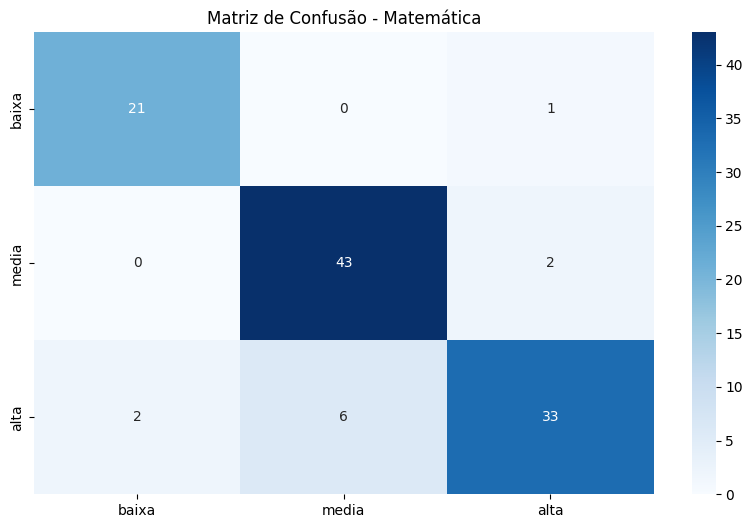

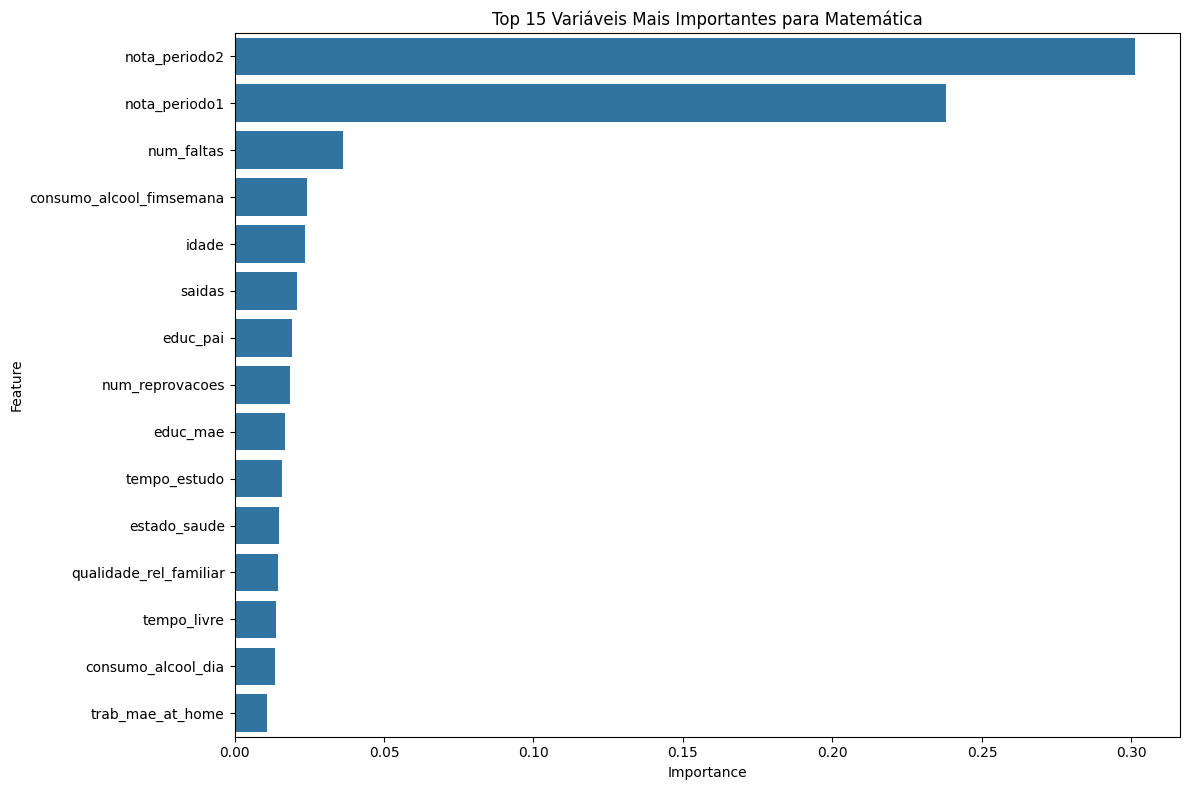


📌 Distribuição das Categorias de Nota:
nota_final
baixa    148
media    136
alta      73
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset de Matemática
url_matematica = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQmEm4SuBKE2_dXddpxAM38P7YbLWcRIAcb5lqql9nKlw4pbNd4sZS__a6oK1mI3MDfQu8PvHEUJVMC/pub?gid=1209425280&single=true&output=csv'
matematica = pd.read_csv(url_matematica)

# 2. Pré-processamento completo
# Verificar valores faltantes
print("Valores faltantes por coluna:")
print(matematica.isnull().sum())

# Definir variável alvo com categorias personalizadas
y = pd.cut(matematica['nota_final'],
           bins=[0, 10, 14, 20],  # Ajuste esses valores conforme necessário
           labels=['baixa', 'media', 'alta'])

# Remover colunas não relevantes
X = matematica.drop(['escola', 'nota_final'], axis=1)

# 3. Identificar tipos de colunas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# 4. Pipeline de pré-processamento com tratamento de NaN
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Preenche NaN com mediana
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenche NaN com moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 5. Pipeline completo do modelo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# 6. Dividir os dados (removendo possíveis NaN restantes em y)
valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 7. Treinar e avaliar
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Métricas de avaliação
print("\n✅ Resultados do Modelo para Matemática:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['baixa', 'media', 'alta']))

# 9. Visualizações
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['baixa', 'media', 'alta'],
            yticklabels=['baixa', 'media', 'alta'])
plt.title('Matriz de Confusão - Matemática')
plt.show()

# 10. Importância das variáveis
feature_importances = model.named_steps['classifier'].feature_importances_
feature_names = numeric_cols.tolist() + \
    model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) \
    .sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Variáveis Mais Importantes para Matemática')
plt.tight_layout()
plt.show()

# 11. Análise complementar
print("\n📌 Distribuição das Categorias de Nota:")
print(y.value_counts())

Valores faltantes por coluna:
escola                          0
sexo                            0
idade                           0
tipo_endereco                   0
tamanho_familia                 0
status_pais                     0
educ_mae                        0
educ_pai                        0
trab_mae                        0
trab_pai                        0
motivo_escolha                  0
responsavel                     0
tempo_viagem                    0
tempo_estudo                    0
num_reprovacoes                 0
apoio_escola                    0
apoio_familia                   0
aulas_particulares              0
atividades_extracurriculares    0
frequentou_creche               0
deseja_superior                 0
acesso_internet                 0
relacionamento_romantico        0
qualidade_rel_familiar          0
tempo_livre                     0
saidas                          0
consumo_alcool_dia              0
consumo_alcool_fimsemana        0
estado_saude      

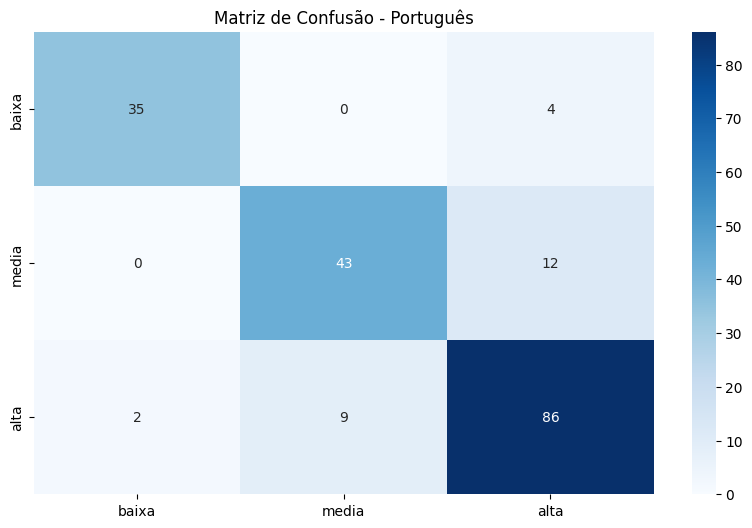

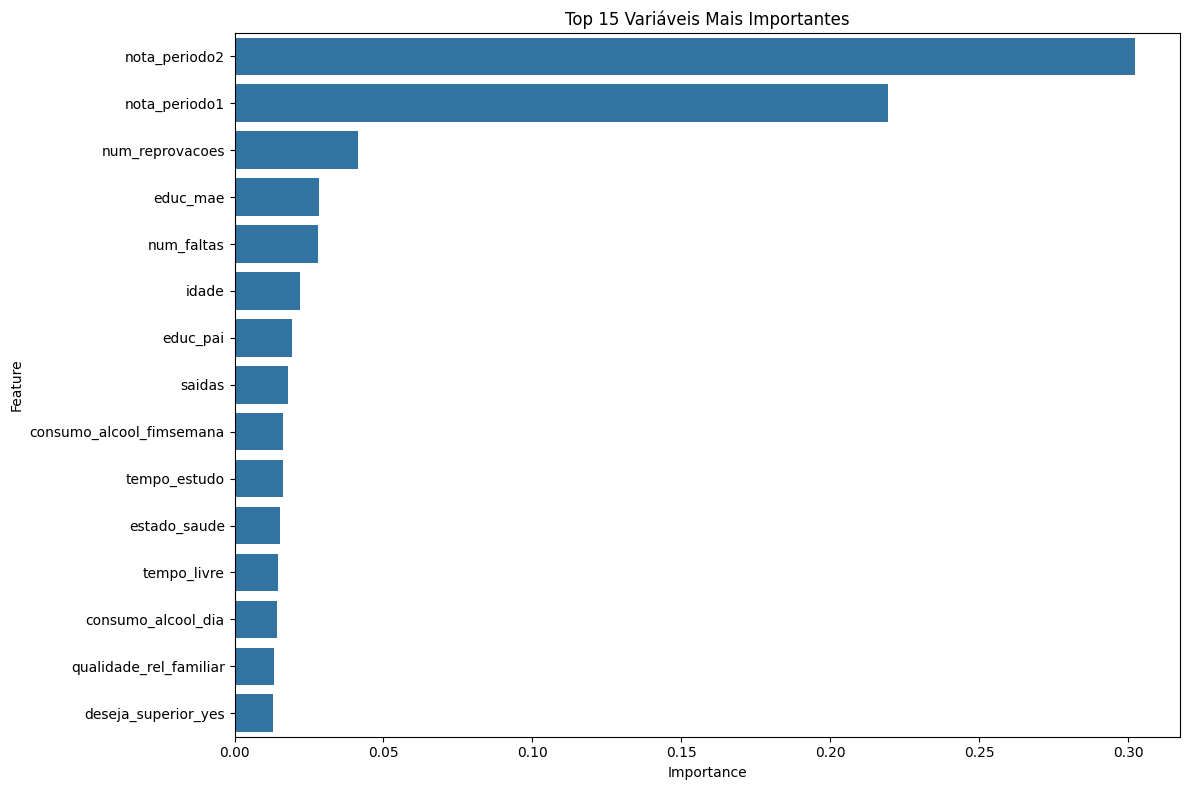

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar e inspecionar o dataset
url_portugues = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQmEm4SuBKE2_dXddpxAM38P7YbLWcRIAcb5lqql9nKlw4pbNd4sZS__a6oK1mI3MDfQu8PvHEUJVMC/pub?gid=998950341&single=true&output=csv'
portugues = pd.read_csv(url_portugues)

# 2. Pré-processamento completo
# Verificar valores faltantes
print("Valores faltantes por coluna:")
print(portugues.isnull().sum())

# Definir variável alvo com categorias personalizadas
y = pd.cut(portugues['nota_final'],
           bins=[0, 10, 14, 20],  # Ajuste esses valores conforme necessário
           labels=['baixa', 'media', 'alta'])

# Remover colunas não relevantes
X = portugues.drop(['escola', 'nota_final'], axis=1)

# 3. Identificar tipos de colunas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# 4. Pipeline de pré-processamento com tratamento de NaN
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Preenche NaN com mediana
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenche NaN com moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 5. Pipeline completo do modelo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# 6. Dividir os dados (removendo possíveis NaN restantes em y)
valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 7. Treinar e avaliar
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Métricas de avaliação
print("\n✅ Resultados do Modelo:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['baixa', 'media', 'alta']))

# 9. Visualizações
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['baixa', 'media', 'alta'],
            yticklabels=['baixa', 'media', 'alta'])
plt.title('Matriz de Confusão - Português')
plt.show()

# 10. Importância das variáveis
feature_importances = model.named_steps['classifier'].feature_importances_
feature_names = numeric_cols.tolist() + \
    model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) \
    .sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Variáveis Mais Importantes')
plt.tight_layout()
plt.show()